In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import RandomizedPCA

In [13]:
df1 = pd.DataFrame.from_csv('data/EBW.csv')
df2 = pd.DataFrame.from_csv('data/IT.csv')

In [14]:
df = pd.merge(left=df2, right=df1, how='left', on='description')
del df1
del df2

In [15]:
df = df.drop_duplicates()
df = df[['exp', 'busyness', 'working_type', 'salary_int']]
df = df.dropna()

In [46]:
nar = df.values
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(nar)
colors = ['r', 'g', 'b']

In [47]:
pca = RandomizedPCA(n_components=2)
nar2d = pca.fit_transform(nar)

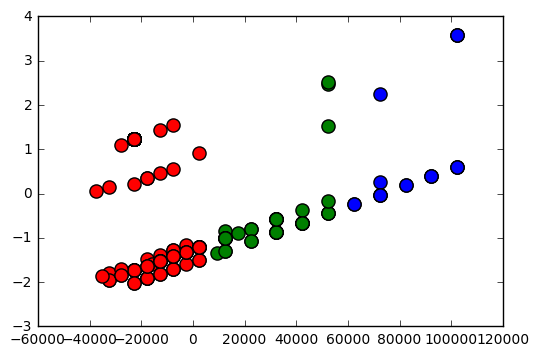

In [49]:
for color, label in zip(colors, set(labels)):
    d = nar2d[labels == label]
    plt.scatter(d[:, 0], d[:, 1], c=color, s=90)